# SciPy 2022 Recap

## Overview

As SOI’s Data Intern I had the chance to virtually attend the SciPy 2022 conference this past week. For my Master's of Ocean Science at Texas A&M university, I took an introduction to Python course that gave me a basic understanding of the language. As Python and I are becoming more familiar, hearing how other researchers and developers in the geosciences (and other fields) use Python was a valuable opportunity. Some of the talks I attended included demonstrations of code to show different packages they used. I have a few shown below. 

These are the links to the Youtube streams from each day and room with the online schedule [here](https://www.scipy2022.scipy.org/update-conference-schedule) to be able to find any specific talk:

-Day 1:
[Zlotnik](https://enthought.us1.list-manage.com/track/click?u=d56fa34bd489ec1233b13064f&id=f28e40e27e&e=957b20bc69)
[Grand Ballroom](https://enthought.us1.list-manage.com/track/click?u=d56fa34bd489ec1233b13064f&id=bc9c51d395&e=957b20bc69)
[Room 204](https://enthought.us1.list-manage.com/track/click?u=d56fa34bd489ec1233b13064f&id=cc4b82a599&e=957b20bc69)

-Day 2:
[Zlotnik](https://www.youtube.com/watch?v=ErBwDTGCZaY&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=4)
[Grand Ballroom](https://www.youtube.com/watch?v=0reGx3KaPDI&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=5)
[Room 204](https://www.youtube.com/watch?v=f9UYgVmHe8M&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=6)

-Day 3:
[Zlotnik](https://www.youtube.com/watch?v=OghFU112jCg&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=8)
[Grand Ballroom](https://www.youtube.com/watch?v=-Jqx5QxaNmA&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=9)
[Room 204](https://www.youtube.com/watch?v=VApMGOpr2LU&list=PLYx7XA2nY5GcuVaU-l1hPOFgtnhmcHZzC&index=10)


Along with the Youtube videos, SciPy 2022 also offered [tutorials](https://www.scipy2022.scipy.org/tutorials-schedule) for training with instructions. As I did not get to attend these live, I will be working through them to continue to develop my skills.

## AstroPy

Megan Sosey discussed how [AstroPy](https://www.astropy.org/) (a package that was new to me), has been instrumental at NASA for the development of the Hubble, Webb, and Roman telescopes. This was a particularly interesting talk to me because of how much Sosey stressed the importance of open source software in the astronomy field. An [example](https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html#sphx-glr-generated-examples-coordinates-plot-obs-planning-py) of using this package is determining and plotting a location of a celestial object, like our sun! The example below was copied from the AstroPy examples website that I plan to work on to learn more about this package.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

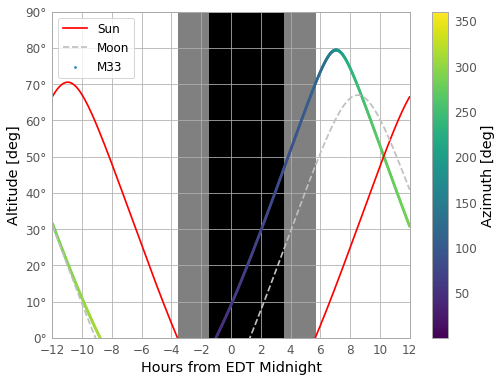

In [10]:
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset

m33 = SkyCoord.from_name('M33')

midnight = Time('2012-7-13 00:00:00') - utcoffset
delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_July13night = AltAz(obstime=midnight+delta_midnight,
                          location=bear_mountain)
m33altazs_July13night = m33.transform_to(frame_July13night)

m33airmasss_July13night = m33altazs_July13night.secz

from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_July12_to_13 = midnight + delta_midnight
frame_July12_to_13 = AltAz(obstime=times_July12_to_13, location=bear_mountain)
sunaltazs_July12_to_13 = get_sun(times_July12_to_13).transform_to(frame_July12_to_13)

from astropy.coordinates import get_moon
moon_July12_to_13 = get_moon(times_July12_to_13)
moonaltazs_July12_to_13 = moon_July12_to_13.transform_to(frame_July12_to_13)

m33altazs_July12_to_13 = m33.transform_to(frame_July12_to_13)

plt.plot(delta_midnight, sunaltazs_July12_to_13.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_July12_to_13.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, m33altazs_July12_to_13.alt,
            c=m33altazs_July12_to_13.az, label='M33', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sunaltazs_July12_to_13.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sunaltazs_July12_to_13.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12*u.hour, 12*u.hour)
plt.xticks((np.arange(13)*2-12)*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()

The figure above shows the direction of the moon and sun relative to an observer (azimuth), located in Bear Mountain, NY on July 12, 2012, in degrees during a 24 hour period.

## Pangeo

One of my favorite talks of the week was given by Julius Buescke where he stressed the importance of the [Pangeo Project](https://pangeo.io/about.html), an operation dedicated to the future of science that ultimately will help reduce the toil of waiting on data and code from other researchers. I was able to relate to this talk because for his [demo](https://github.com/jbusecke/xMIP/blob/main/docs/tutorial.ipynb) Buescke used CMIP6 (cloud model data, now known as xMIP) of which I have used for a research project. This was a neat relation getting to see how someone else has used this same data in a different program than where I was analyzing it.

This example code comes from the Pangeo examples [sea-surface-height](https://github.com/pangeo-data/pangeo-example-notebooks/blob/master/sea-surface-height.ipynb) notebook on github. This code demonstrates how to import an example code from Pangeo. This example included some new libraries to me such as [dask](https://www.dask.org/) and [intake](https://pypi.org/project/intake/). Intake is generally used to load data and dask helps scale  libraries like numpy and pandas and was pip installed. [Zarr](https://zarr.readthedocs.io/en/stable/), a younger library used for the storage of N-dinemsional arrays, was also needed for this example and pip installed.

In [17]:
import matplotlib.pyplot as plt
import intake
import dask
%matplotlib inline
import xarray as xr
import requests
import zarr
import dask.array as da
from intake import open_catalog

In [19]:
cat= open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
list(cat)

['ocean', 'atmosphere', 'climate', 'hydro']

In [20]:
ds= cat.ocean.sea_surface_height
ds

sea_surface_height:
  args:
    consolidated: true
    storage_options:
      requester_pays: true
    urlpath: gs://pangeo-cmems-duacs
  description: sea-surface altimetry data from The Copernicus Marine Environment
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs
    tags:
    - ocean
    - satellite
    url: http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&view=details&product_id=SEALEVEL_GLO_PHY_L4_REP_OBSERVATIONS_008_047


## Conclusion

Overall attending SciPy 2022 was a great learning experience by getting introduced to new libraries, data packages, data analysis, plotting techniques and projects that researchers from different fields are working on. 